In [81]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
from sklearn.metrics import confusion_matrix



# Load the dataset
df = pd.read_csv('/kaggle/input/ccfdetection/creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


Now we randomize the data and get it ready for splitting. 

In [82]:
df = df.sample(frac=1, random_state=1)
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
169876,119907.0,-0.611712,-0.769705,-0.149759,-0.224877,2.028577,-2.019887,0.292491,-0.523020,0.358468,...,-0.075208,0.045536,0.380739,0.023440,-2.220686,-0.201146,0.066501,0.221180,1.79,0
127467,78340.0,-0.814682,1.319219,1.329415,0.027273,-0.284871,-0.653985,0.321552,0.435975,-0.704298,...,-0.128619,-0.368565,0.090660,0.401147,-0.261034,0.080621,0.162427,0.059456,1.98,0
137900,82382.0,-0.318193,1.118618,0.969864,-0.127052,0.569563,-0.532484,0.706252,-0.064966,-0.463271,...,-0.305402,-0.774704,-0.123884,-0.495687,-0.018148,0.121679,0.249050,0.092516,0.89,0
21513,31717.0,-1.328271,1.018378,1.775426,-1.574193,-0.117696,-0.457733,0.681867,-0.031641,0.383872,...,-0.220815,-0.419013,-0.239197,0.009967,0.232829,0.814177,0.098797,-0.004273,15.98,0
134700,80923.0,1.276712,0.617120,-0.578014,0.879173,0.061706,-1.472002,0.373692,-0.287204,-0.084482,...,-0.160161,-0.430404,-0.076738,0.258708,0.552170,0.370701,-0.034255,0.041709,0.76,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21440,31666.0,-2.986845,-8.663978,-1.910863,0.664058,-3.934875,0.861269,1.647511,-0.480963,-1.546866,...,1.252092,-0.993085,-2.173147,0.145570,-0.235062,-0.227411,-0.382702,0.404045,2312.26,0
117583,74729.0,0.937083,-0.849673,0.524186,-0.020031,-0.606327,0.692302,-0.463724,0.148857,0.785062,...,-0.143322,-0.479981,-0.237902,-0.715247,0.251418,0.975406,-0.060168,0.023771,171.32,0
73349,55095.0,-1.149963,1.696462,1.637114,2.658991,-0.021502,0.192287,0.205204,0.588754,-1.187820,...,0.025147,0.086506,-0.262748,0.321538,0.341667,0.210343,-0.162047,0.031193,7.58,0
267336,162728.0,1.754554,-0.699398,-0.076332,0.443915,-0.672082,0.389061,-0.807534,0.202915,0.858635,...,0.141950,0.358412,0.259748,0.746839,-0.560808,0.104636,-0.005853,-0.019622,94.80,0


The data is now randomized and ready to split.

In [83]:
train, test, val = df[:240000], df[240000:262000], df[262000:]
train['Class'].value_counts(), test['Class'].value_counts(), val['Class'].value_counts()

(Class
 0    239589
 1       411
 Name: count, dtype: int64,
 Class
 0    21955
 1       45
 Name: count, dtype: int64,
 Class
 0    22771
 1       36
 Name: count, dtype: int64)

The dataset is being divided by rows, with the first 240,000 for training, the next 22,000 for testing, and the remainder for validation.

Training Set: Out of 240,000 samples, 239,589 belong to class 0 ('Not Fraud') and 411 belong to class 1 ('Fraud').

Testing Set: Out of 22,000 samples, 21,955 belong to class 0 ('Not Fraud') and 45 belong to class 1 ('Fraud').

Validation Set: Out of the remaining samples, 22,771 belong to class 0 ('Not Fraud') and 36 belong to class 1 ('Fraud').

In [84]:
# Convert the 'train', 'test', and 'val' DataFrames into NumPy arrays for faster numerical processing.
train_np, test_np, val_np = train.to_numpy(), test.to_numpy(), val.to_numpy()

# Split the 'train_np' array into features (all columns except the last) and labels (only the last column).
x_train, y_train = train_np[:, :-1], train_np[:, -1]

# Split the 'test_np' array into features (all columns except the last) and labels (only the last column).
x_test, y_test = test_np[:, :-1], test_np[:, -1]

# Split the 'val_np' array into features (all columns except the last) and labels (only the last column).
x_val, y_val = val_np[:, :-1], val_np[:, -1]

# Get the shapes of the features and labels arrays for training, testing, and validation sets to verify dimensions.
x_train.shape, y_train.shape, x_test.shape, y_test.shape, x_val.shape, y_val.shape


((240000, 30), (240000,), (22000, 30), (22000,), (22807, 30), (22807,))

x_train.shape is (240000, 30), meaning the training feature set contains 240,000 samples and 30 features.

y_train.shape is (240000,), meaning the training labels array contains 240,000 samples, which corresponds to the labels for each of the training set features.

x_test.shape is (22000, 30), meaning the testing feature set contains 22,000 samples and 30 features.

y_test.shape is (22000,), meaning the testing labels array contains 22,000 samples, which are the labels for the testing set features.

x_val.shape is (22807, 30), meaning the validation feature set contains 22,807 samples and 30 features.

y_val.shape is (22807,), meaning the validation labels array contains 22,807 samples, which are the labels for the validation set features.

These shapes are important because they confirm that the features and labels have been correctly separated and that the number of samples matches between the x (features) and y (labels) arrays for each set. This is a necessary step before proceeding with training machine learning models.

In [85]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)
logistic_model.score(x_train, y_train)

from sklearn.metrics import classification_report
print(classification_report(y_val, logistic_model.predict(x_val), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     22771
       Fraud       0.59      0.67      0.62        36

    accuracy                           1.00     22807
   macro avg       0.79      0.83      0.81     22807
weighted avg       1.00      1.00      1.00     22807



/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Logistic Regression Model**

For the 'Not Fraud' class (negative class labeled as '0'):

**Precision:** The model's precision is 1.00, meaning that every time it predicted 'Not Fraud', it was correct.
**Recall:** The model's recall is also 1.00, indicating that it identified all 'Not Fraud' cases in the validation set.
**F1-Score:** Given that both precision and recall are 1, the F1-Score is also 1, which is the harmonic mean of precision and recall. This suggests perfect classification for the 'Not Fraud' class.
**Support:** There are 22,771 instances labeled as 'Not Fraud' in the validation set.

For the 'Fraud' class (the positive class, labeled as '1'):

**Precision:** The precision for 'Fraud' is 0.59, which means that when the model predicts 'Fraud', it is correct 59% of the time.
**Recall:** The recall for 'Fraud' is 0.67, indicating that the model correctly identifies 67% of all actual 'Fraud' cases.
**F1-Score:** The F1-Score for 'Fraud' is 0.62, showing a balance between precision and recall for this class.
**Support:** There are 36 instances labeled as 'Fraud' in the validation set.
**Accuracy:** The overall accuracy of the model on the validation set is 1.00, which is extremely high and might be due to a large imbalance between the 'Not Fraud' and 'Fraud' classes.

**Macro Avg:** The macro average for precision, recall, and F1-score is 0.79, 0.83, and 0.81 respectively, averaging the performance of the model across classes without considering the class imbalance.

**Weighted Avg:** The weighted average for precision, recall, and F1-score is 1.00, which takes into account the class imbalance by weighting the performance of each class by its presence in the dataset.

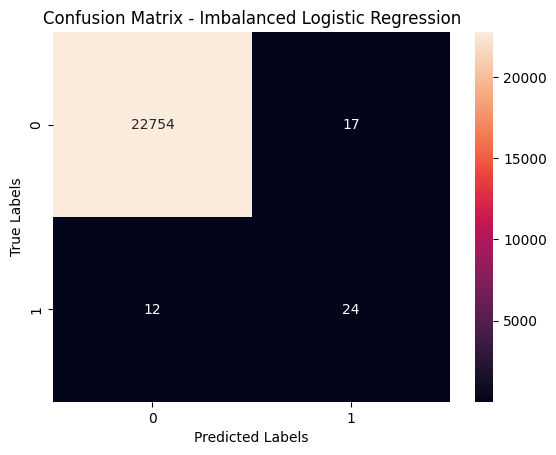

In [86]:
# Predictions from imbalanced Logistic Regression model
logistic_imbalanced_pred = logistic_model.predict(x_val)

# Confusion matrix for imbalanced Logistic Regression
cm_logistic_imbalanced = confusion_matrix(y_val, logistic_imbalanced_pred)

# Plotting
sns.heatmap(cm_logistic_imbalanced, annot=True, fmt='g')
plt.title('Confusion Matrix - Imbalanced Logistic Regression')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


**True Negatives (TN):** 22754 - Non-fraudulent transactions correctly identified.     
**False Positives (FP):** 17 - Non-fraudulent transactions incorrectly labeled as fraudulent.     
**False Negatives (FN):** 12 - Fraudulent transactions incorrectly labeled as non-fraudulent.     
**True Positives (TP):** 24 - Fraudulent transactions correctly identified.

In [87]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=2, n_jobs=-1)
rf.fit(x_train, y_train)
print(classification_report(y_val, rf.predict(x_val), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     22771
       Fraud       0.77      0.47      0.59        36

    accuracy                           1.00     22807
   macro avg       0.89      0.74      0.79     22807
weighted avg       1.00      1.00      1.00     22807



**Random Forrest Classifier**

For the 'Not Fraud' class:

**Precision:** 1.00, meaning the model was correct every time it predicted a case was not fraud.
**Recall:** 1.00, indicating the model identified all 'Not Fraud' cases correctly.
**F1-Score:** 1.00, the harmonic mean of precision and recall, which is perfect in this case.
**Support:** The model was tested on 22,771 cases of 'Not Fraud'.

For the 'Fraud' class:

**Precision:** 0.77, when the model predicted fraud, it was correct about 77% of the time.
**Recall:** 0.47, the model identified 47% of all actual fraud cases.
**F1-Score:** 0.59, which considers both precision and recall, is lower than the 'Not Fraud' class indicating room for improvement in detecting fraud cases.
**Support:** There were 36 actual cases of 'Fraud' in the validation set.
**Accuracy:** The overall accuracy of the model on the validation set is 1.00 (or 100%), which is extremely high. However, this metric is misleading because of an imbalanced dataset, where 'Not Fraud' class vastly outnumbers the 'Fraud' class.

**Macro AVG:** The macro average score takes the average of the precision, recall, and F1-score for both classes without considering the imbalance. These scores are 0.89 for precision, 0.74 for recall, and 0.79 for F1-score, reflecting that the model's performance is not as strong on the minority class ('Fraud').

**Weighted AVG:** The weighted average takes the class imbalance into account and is high (1.00) across precision, recall, and F1-score due to the dominance of the 'Not Fraud' class.

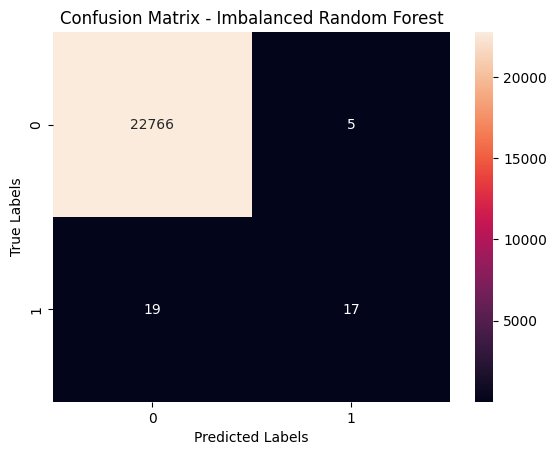

In [88]:
# Predictions from imbalanced Random Forest model
rf_imbalanced_pred = rf.predict(x_val)

# Confusion matrix for imbalanced Random Forest
cm_rf_imbalanced = confusion_matrix(y_val, rf_imbalanced_pred)

# Plotting
sns.heatmap(cm_rf_imbalanced, annot=True, fmt='g')
plt.title('Confusion Matrix - Imbalanced Random Forest')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


**True Negatives (22766):** Non-fraudulent transactions correctly identified as non-fraudulent.     
**False Positives (5):** Non-fraudulent transactions incorrectly identified as fraudulent.     
**False Negatives (19):** Fraudulent transactions incorrectly identified as non-fraudulent.    
**True Positives (17):** Fraudulent transactions correctly identified as fraudulent.    

The above models were done on imbalanced data where 'Not Fraud' cases were way more 'Fraud' fraudulent cases. This kind of imbalance can make our machine learning models biased. They might get really good at spotting the non-fraudulent transactions (because there are so many of them) but then do a lousy job at catching the few frauds, which is what we're actually interested in.
Lets try to sample a balanced data with 1:1 ratio where 492 are 'Not Fraud' and 492 'Fraud' transactions. 

In [89]:
not_frauds = df.query('Class == 0')
frauds = df.query('Class == 1')
not_frauds['Class'].value_counts(), frauds['Class'].value_counts()

(Class
 0    284315
 Name: count, dtype: int64,
 Class
 1    492
 Name: count, dtype: int64)

In [90]:
balanced_df = pd.concat([frauds, not_frauds.sample(len(frauds), random_state=1)])
balanced_df['Class'].value_counts()

Class
1    492
0    492
Name: count, dtype: int64

In [91]:
balanced_df = balanced_df.sample(frac=1, random_state=1)
balanced_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
18372,29428.0,-1.762593,0.256143,1.683125,-1.279233,-1.902762,1.004210,-1.009748,-2.432546,0.458860,...,2.493579,0.320829,-0.535481,0.499401,-0.915196,-0.423434,0.107049,0.175922,230.00,0
96341,65728.0,1.227614,-0.668974,-0.271785,-0.589440,-0.604795,-0.350285,-0.486365,-0.010809,-0.794944,...,-0.026055,-0.295255,-0.180459,-0.436539,0.494649,-0.283738,-0.001128,0.035075,98.01,1
248296,153875.0,-0.613696,3.698772,-5.534941,5.620486,1.649263,-2.335145,-0.907188,0.706362,-3.747646,...,0.319261,-0.471379,-0.075890,-0.667909,-0.642848,0.070600,0.488410,0.292345,0.00,1
264328,161376.0,-0.011624,0.640413,0.868046,-0.505279,0.261938,0.223098,0.239049,0.150877,0.225142,...,0.069401,0.268024,0.261459,0.683742,-1.567901,-0.816674,0.185781,0.283021,2.49,0
208904,137323.0,-0.679341,1.217389,-0.316778,-1.086725,0.855349,-0.980760,0.970589,0.133116,-0.357671,...,-0.083048,-0.137032,-0.238920,-0.617244,0.039020,-0.081848,0.234633,0.128382,0.01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81557,58990.0,-4.502731,-3.876484,1.341248,0.113400,0.189428,-0.560985,-0.140478,0.684651,0.475363,...,-0.140218,0.049411,2.313731,0.252330,0.307219,0.859051,0.184033,-0.308269,324.55,0
276071,166883.0,2.091900,-0.757459,-1.192258,-0.755458,-0.620324,-0.322077,-1.082511,0.117200,-0.140927,...,0.288253,0.831939,0.142007,0.592615,-0.196143,-0.136676,0.020182,-0.015470,19.95,1
175971,122574.0,1.972989,0.157281,-1.715078,1.207451,0.681612,-0.615282,0.601791,-0.291935,-0.132265,...,0.098640,0.467533,-0.078973,-0.371882,0.486038,-0.490665,-0.018374,-0.070911,27.42,0
27738,34684.0,-2.439237,2.591458,-2.840126,1.286244,-1.777016,-1.436139,-2.206056,-2.282725,-0.292885,...,1.774460,-0.771390,0.065727,0.103916,-0.057578,0.242652,-0.268649,-0.743713,125.30,1


In [92]:
# Convert the 'balanced_df' DataFrame into a NumPy array for efficient computation.
balanced_df_np = balanced_df.to_numpy()

# Split the first 700 rows of 'balanced_df_np' for training, with all columns except the last as features (X) 
# and the last column as labels (Y), and convert the labels to integer data type.
x_train_b, y_train_b = balanced_df_np[:700, :-1], balanced_df_np[:700, -1].astype(int)

# Split rows 700 to 842 of 'balanced_df_np' for testing, with all columns except the last as features (X) 
# and the last column as labels (Y), and convert the labels to integer data type.
x_test_b, y_test_b = balanced_df_np[700:842, :-1], balanced_df_np[700:842, -1].astype(int)

# Split the remaining rows of 'balanced_df_np' after the 842nd for validation, with all columns except 
# the last as features (X) and the last column as labels (Y), and convert the labels to integer data type.
x_val_b, y_val_b = balanced_df_np[842:, :-1], balanced_df_np[842:, -1].astype(int)

# Retrieve and display the shapes of the feature and label datasets for training, testing, 
# and validation sets to ensure correct dimensions.
x_train_b.shape, y_train_b.shape, x_test_b.shape, y_test_b.shape, x_val_b.shape, y_val_b.shape


((700, 30), (700,), (142, 30), (142,), (142, 30), (142,))

So, what I did was balance things out. I kept all the fraud cases and then randomly picked the same number of non-fraud cases. This way, my dataset isn't leaning heavily towards one type anymore. It's super important for what I'm trying to do – detect fraud – because it makes the model pay equal attention to both fraud and non-fraud transactions. And this is really handy for the machine learning methods I'm using, as they work best when they don't have to deal with skewed data like we had at the start.

In [93]:
balanced_logistic_model = LogisticRegression()
balanced_logistic_model.fit(x_train_b, y_train_b)
print(classification_report(y_val_b, balanced_logistic_model.predict(x_val_b), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       0.96      0.92      0.94        72
       Fraud       0.92      0.96      0.94        70

    accuracy                           0.94       142
   macro avg       0.94      0.94      0.94       142
weighted avg       0.94      0.94      0.94       142



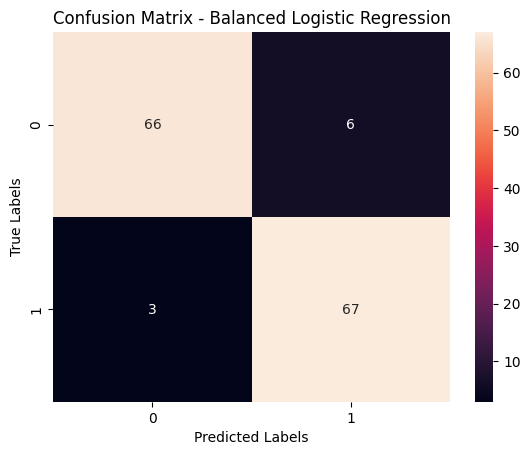

In [94]:
# Predictions from balanced Logistic Regression model
logistic_balanced_pred = balanced_logistic_model.predict(x_val_b)

# Confusion matrix for balanced Logistic Regression
cm_logistic_balanced = confusion_matrix(y_val_b, logistic_balanced_pred)

# Plotting
sns.heatmap(cm_logistic_balanced, annot=True, fmt='g')
plt.title('Confusion Matrix - Balanced Logistic Regression')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


**True Negatives (66):** The number of non-fraud cases correctly identified as non-fraud.    
**False Positives (6):** The number of non-fraud cases incorrectly labeled as fraud.    
**False Negatives (3):** The number of fraud cases incorrectly labeled as non-fraud.    
**True Positives (67):** The number of fraud cases correctly identified as fraud.   

In [95]:
balanced_rf = RandomForestClassifier(max_depth=2, n_jobs=-1)
balanced_rf.fit(x_train_b, y_train_b)
print(classification_report(y_val_b, rf.predict(x_val_b), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       0.69      1.00      0.82        72
       Fraud       1.00      0.54      0.70        70

    accuracy                           0.77       142
   macro avg       0.85      0.77      0.76       142
weighted avg       0.84      0.77      0.76       142



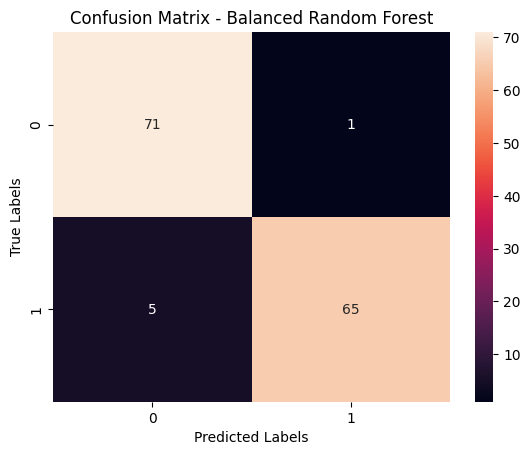

In [96]:
# Predictions from balanced Random Forest model
rf_balanced_pred = balanced_rf.predict(x_val_b)

# Confusion matrix for balanced Random Forest
cm_rf_balanced = confusion_matrix(y_val_b, rf_balanced_pred)

# Plotting
sns.heatmap(cm_rf_balanced, annot=True, fmt='g')
plt.title('Confusion Matrix - Balanced Random Forest')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


**True Negatives (71):** The model accurately predicted 70 non-fraud cases.    
**False Positives (1):** It mistakenly predicted 2 non-fraud cases as fraud.    
**False Negatives (5):** It incorrectly labeled 5 fraud cases as non-fraud.    
**True Positives (65):** The model correctly identified 65 fraud cases.   

**The comparison between Logistic Regression and Random Forest models trained on both imbalanced and balanced** datasets highlights the significant influence of data composition on model performance, especially in fraud detection. In imbalanced scenarios, where non-fraudulent transactions vastly outnumber fraudulent ones, both models exhibit high accuracy and precision for the 'Not Fraud' class but struggle with the recall for the 'Fraud' class, indicating a bias towards the majority class. However, when trained on balanced datasets, the performance of both models becomes more uniform across classes. Logistic Regression shows a commendable balance in precision and recall for both classes, indicating its robustness and suitability for balanced data. In contrast, the Random Forest model, while achieving perfect precision for 'Fraud' on the balanced dataset, still shows a discrepancy in recall, suggesting a nuanced trade-off in its ability to correctly identify fraud cases. This comparison underscores the importance of dataset balance in developing models that can effectively and equitably handle both majority and minority classes in contexts where each class is equally important.